<a href="https://colab.research.google.com/github/shedhae/competitve-programming-online-competitions/blob/main/irisFlowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
#load the data file
data =pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
print("missing values:\n",data.isnull().sum())
data.describe()

missing values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


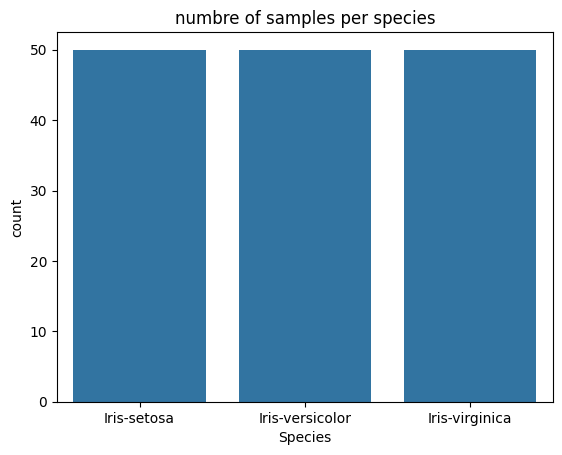

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
#counting species
sns.countplot(x='Species',data=data)
plt.title("numbre of samples per species")
plt.show()



Text(0.5, 1.0, 'scatter plot of sepal length vs sepal width')

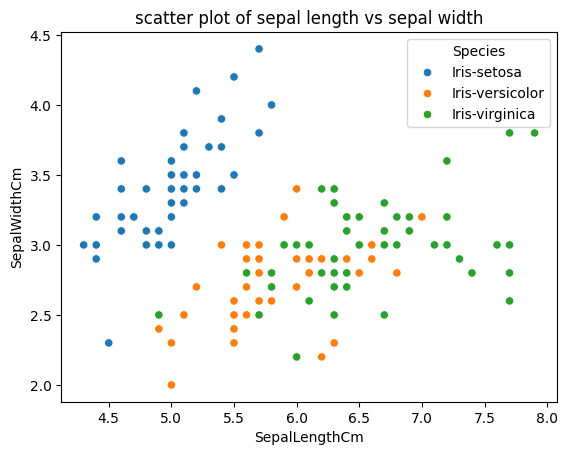

In [8]:
#scatter plot
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=data)
plt.title("scatter plot of sepal length vs sepal width")

Text(0.5, 1.0, 'scatter plot of petal length vs petal width')

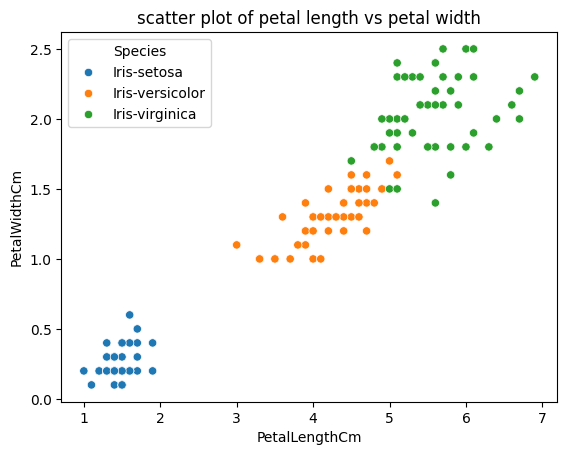

In [9]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=data)
plt.title("scatter plot of petal length vs petal width")


In [10]:
#encode labels of species
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Species_encoded']=le.fit_transform(data['Species'])
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [11]:
from os import XATTR_CREATE
from sklearn.model_selection import train_test_split
#features x , target y

x=data.drop(['Id','Species','Species_encoded'],axis=1)
y=data['Species_encoded']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print("training set size:",len(X_train))
print("testing set size:",len(X_test))





training set size: 120
testing set size: 30


In [12]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)



In [13]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f} ({(accuracy * 100):.0f}%)")



Model Accuracy: 1.00 (100%)


In [20]:
new_data=pd.DataFrame({
    'SepalLengthCm':[5.1],
    'SepalWidthCm':[3.5],
    'PetalLengthCm':[1.4],
    'PetalWidthCm':[0.2]
})

new_prediction=model.predict(new_data)
print("predicted species:",le.inverse_transform(new_prediction))


predicted species: ['Iris-setosa']
